In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2

In [2]:
def cdf (x):
    if x<= 0:
        return 0.5*np.exp(x)
    else:
        return 1-0.5*np.exp(-x)

In [3]:
def inverse_cdf (p):
    if p<=0.5:
        return np.log(2*p)
    else:
        return -np.log(2-2*p)

In [4]:
def find_bounds(n, alpha=0.05):
    c1 = 0
    c2 = n
    p_ = 0
    p = 0
    while p_ <= alpha/2:
        p_ += scipy.special.comb(n, c1)*(0.5)**n
        c1 += 1
        
    while p <= alpha/2:
        p += scipy.special.comb(n, c2)*(0.5)**n
        c2 -= 1
    
    return (c1-1, c2+1)

In [5]:
def power_score(theta, n, theta0 = 5.0, alpha=0.05):
    c1, c2 = find_bounds(n, alpha)
    p = 1 - cdf(theta0 - theta)
    s = 0
    for k in range(0,c1):
        s += scipy.special.comb(n, k)*(p**k)*(1-p)**(n-k)
    
    for k in range(c2+1, n+1):
        s += scipy.special.comb(n, k)*(p**k)*(1-p)**(n-k)
    
    return s

In [6]:
def power_LR (theta, n, theta0 = 5.0, alpha=0.05):
    power_LR = 0
    chi2_alpha = chi2.ppf(1-alpha, 1)

    for k in range(10000):
        u = np.random.rand(n)
        err = [inverse_cdf(val) for val in u]
        err = np.array(err)

        x = theta + err
        q2 = np.median(x)
        absdiff1 = np.abs(x - theta0)
        absdiff2 = np.abs(x - q2)

        chi2_LR = 2*(np.sum(absdiff1) - np.sum(absdiff2))

        if chi2_LR >= chi2_alpha:
            power_LR += 1
    
    return power_LR/10000

def power_W (theta, n, theta0 = 5.0, alpha=0.05):
    power_W = 0
    chi2_alpha = chi2.ppf(1-alpha, 1)
    
    for k in range(10000):
        u = np.random.rand(n)
        err = [inverse_cdf(val) for val in u]
        err = np.array(err)

        x = theta + err
        q2 = np.median(x)

        chi2_W = n*(q2-theta0)**2

        if chi2_W >= chi2_alpha:
            power_W += 1
    
    return power_W/10000

In [7]:
N = [20, 100, 1000]
colors = ['midnightblue', 'turquoise', 'salmon']

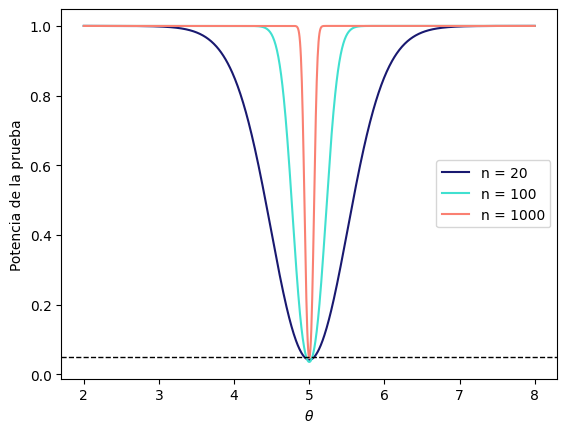

In [8]:
theta = np.linspace(2, 8, 1000)

for i, n in enumerate(N):
    y = [power_score(val, n) for val in theta]
    plt.plot(theta, y, color=colors[i], label='n = {}'.format(n))

plt.xlabel(r'$\theta$')
plt.ylabel(r'Potencia de la prueba')
plt.axhline(0.05, linewidth=1, color='k', ls='--')
plt.legend()
plt.savefig('Est-T7/power_score.png')

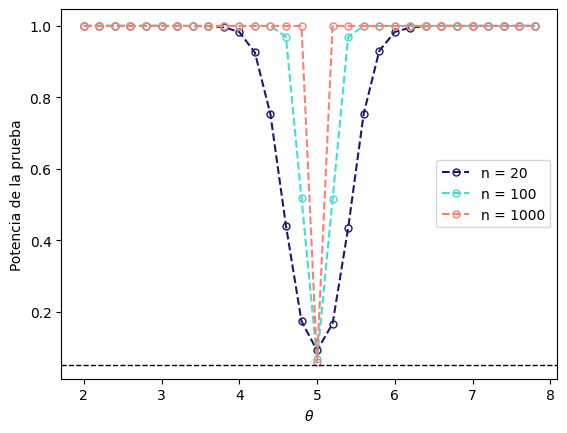

In [9]:
theta = np.arange(2, 8, 0.2)

for i, n in enumerate(N):
    y = [power_W(val, n) for val in theta]
    plt.plot(theta, y, ls='--', color=colors[i], marker='o', ms=5,
         fillstyle='none', label='n = {}'.format(n))

plt.xlabel(r'$\theta$')
plt.ylabel(r'Potencia de la prueba')
plt.axhline(0.05, linewidth=1, color='k', ls='--')
plt.legend()
plt.savefig('Est-T7/power_Wald.png')

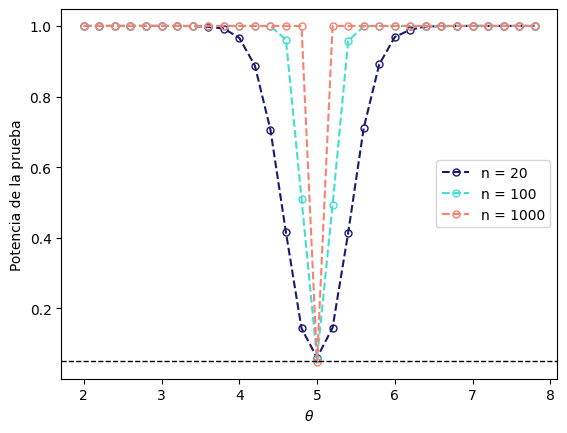

In [10]:
theta = np.arange(2, 8, 0.2)

for i, n in enumerate(N):
    y = [power_LR(val, n) for val in theta]
    plt.plot(theta, y, ls='--', color=colors[i], marker='o', ms=5,
         fillstyle='none', label='n = {}'.format(n))

plt.xlabel(r'$\theta$')
plt.ylabel(r'Potencia de la prueba')
plt.axhline(0.05, linewidth=1, color='k', ls='--')
plt.legend()
plt.savefig('Est-T7/power_LR.png')